> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
 
● ‘Schedule dDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Note:- about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

we have a CSV files contains the data we are going to analyze


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

After importing packages i will make several steps 

first : I will import the csv file from the databases

second : I will explore the imported dataset

third : I will check the imported dataset for cleanliness

fourth : I will clean the dataset for the following work

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types command look for instances of missing or possibly errant data.
df_app = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# knowing the shape of the dataset
df_app.shape

(110527, 14)

Dataset consist of 110527 rows and 14 columns

In [4]:
# checking for any missing data in the dataset to be handled
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data

In [5]:
# knowing type of each column in the dataset
df_app.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# checking for nan values
df_app.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no nan data

In [7]:
# checking for duplication in the data set
df_app.duplicated().sum()

0

There is no duplicated rows

In [8]:
# checking the no. of unique patient id
df_app['PatientId'].nunique()

62299

There is only 62299 out of 110527 are unique values

In [9]:
# checking the no. of duplicated patient id
df_app['PatientId'].duplicated().sum()

48228

There is 48228 duplicated patient ID

In [10]:
# checking the no. of duplicated patient id and no-show
# to check if there patients id duplicated but not duplicated in the no-show data
df_app.duplicated(['PatientId','No-show']).sum()

38710

There are 38710 patients id have the same case of showing or no
we will remove them in the cleaning data section

In [11]:
# knowing information about the data
df_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We have investgated some data like :

mean age is 37

max age is 115

min age is -1 which is propably mistake (we will remove it as only single value and i guess it was amistake and it would not 
effect our analysis)

about 50%  of ages are between 18 and 55 years old

about 25% received sms 

majority doesn't have chornic disseases

being alcohol addictives nor enrolled in scholarship

Majority are not handcapped

In [12]:
# while exploring data i found arow have age with minus value i will idetify it to drop
age_error = df_app.query('Age == "-1"')
age_error

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning

In [13]:
### Data Cleaning 
# i will drop the row have age with minus value
df_app.drop(index=99832, inplace=True)

In [14]:
df_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
#rename columns
df_app.rename(columns={'No-show':'No_show'}, inplace=True)
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#removing replicated patient id with replicated showing 
#because may be the same patient have several appointment he come some and donot come the other some
df_app.drop_duplicates(['PatientId','No_show'], inplace=True)
df_app.shape

(71816, 14)

In [17]:
# removing columns i will not use
df_app.drop(['AppointmentID','PatientId'], axis=1, inplace=True)
df_app.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data wrangling summary
After importing the data from the csv file we explored the first few rows of the data set and it's general properties, then we showed the shape of our data, then we checked if there were any duplicated rows.Then explored if there was duplicated patients ids and removed them, then we turned to data information like data types and if there is any missing data to handle, then we saw some properties about our data like (min, max, mean...etc), and finally we cleaned our data by correcting the columns names and dropping the unnecessary information.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

Now that we've cleaned the data set ,we are now  ready to start the exploration.

Computing statistics and creating visualizations with the goal of addressing the study questions that we mentioned it in the introduction section.


### General look

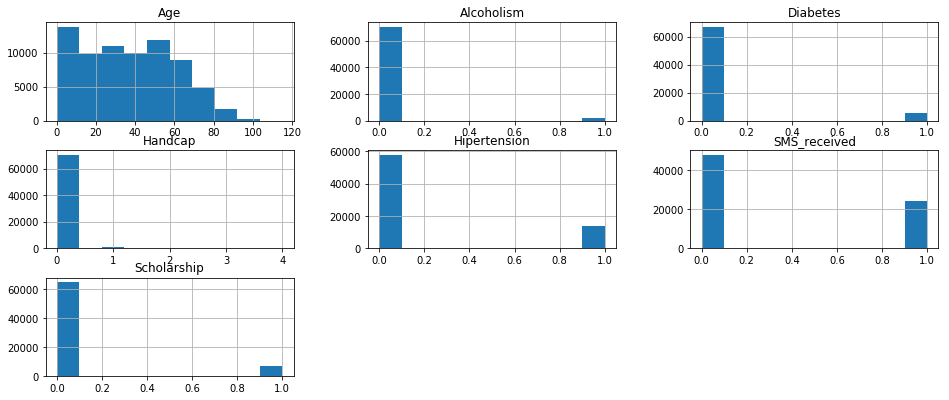

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_app.hist(figsize=(16,6.5));

In [19]:
# dividing the patients to 2 groups according to showing or not then exploring them
sh=df_app.No_show=='No'
nsh=df_app.No_show=='Yes'
df_app[sh].count(),df_app[nsh].count()

(Gender            54153
 ScheduledDay      54153
 AppointmentDay    54153
 Age               54153
 Neighbourhood     54153
 Scholarship       54153
 Hipertension      54153
 Diabetes          54153
 Alcoholism        54153
 Handcap           54153
 SMS_received      54153
 No_show           54153
 dtype: int64, Gender            17663
 ScheduledDay      17663
 AppointmentDay    17663
 Age               17663
 Neighbourhood     17663
 Scholarship       17663
 Hipertension      17663
 Diabetes          17663
 Alcoholism        17663
 Handcap           17663
 SMS_received      17663
 No_show           17663
 dtype: int64)

The number of showed patients is (54153) which are 3 times greater than non showed (17663)

In [20]:
df_app[sh].mean(),df_app[nsh].mean()

(Age             37.229166
 Scholarship      0.091334
 Hipertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

We investigated that :

mean age for showed patients is 37 years old

no showed is 34 patients 

received sms less than no show patients which means we have to revise our sms policies

## Studying the effecting factors on the attendance rate

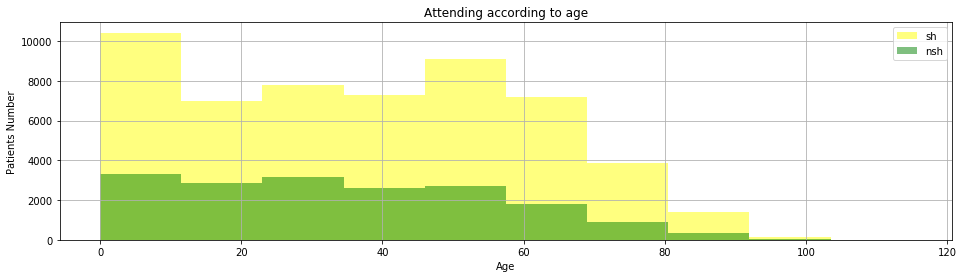

In [21]:
# does age affect the attendence
def attendance(df_app,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df_app[col_name][sh].hist(alpha=0.5, bins=10, color='yellow', label='sh')
    df_app[col_name][nsh].hist(alpha=0.5, bins=10, color='green', label='nsh')
    plt.legend();
    plt.title('Attending according to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df_app, 'Age', sh, nsh)
   

Age from 0 years old to 8 years old have the most attendance rate that because parents taking care of their kids

Then the age from 45 years old to 55 years old and the least attending are whom above 65 years old

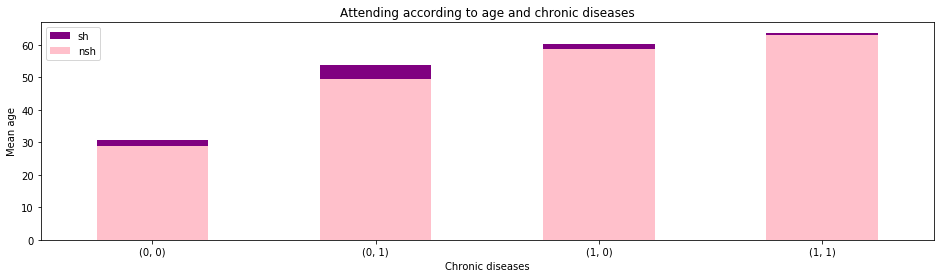

In [22]:
# does either age and chronic diseases affect the attendence rate
plt.figure(figsize=[16,4])
df_app[sh].groupby(['Hipertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='purple', label='sh')
df_app[nsh].groupby(['Hipertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='pink', label='nsh')
plt.legend();
plt.title('Attending according to age and chronic diseases')
plt.xticks(rotation=0)
plt.xlabel('Chronic diseases')
plt.ylabel('Mean age');

In [23]:
df_app[sh].groupby(['Hipertension', 'Diabetes']).mean()['Age'], df_app[nsh].groupby(['Hipertension', 'Diabetes']).mean()['Age']

(Hipertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hipertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

From above result the mean age of non chronic diseases showing patients is 30 years old and non showing is 28 years old

The mean age of hipertensive diabetic showing patients is around 64 years old and non showing is about 63 years old

### Non showing is about 63 which means that there is a connection between age and chronic diseases 

### And no connection between chronic diseases and attending 

### Does gender affect the attendence rate?

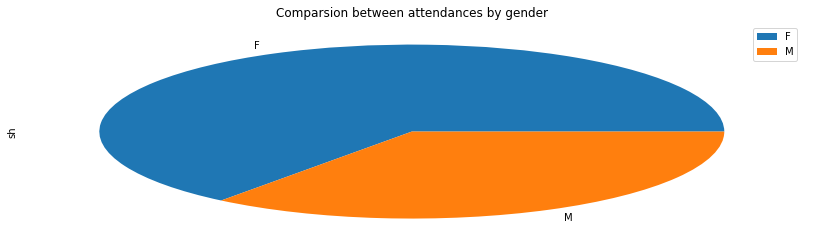

In [24]:
# what is the percentage of genders attending?
def attendance(df_app,col_name,attended,absent):
    plt.figure(figsize=[14,4])
    df_app[col_name][sh].value_counts(normalize=True).plot(kind='pie', label='sh')
    plt.legend();
    plt.title('Comparsion between attendances by gender');
attendance(df_app, 'Gender', sh, nsh)

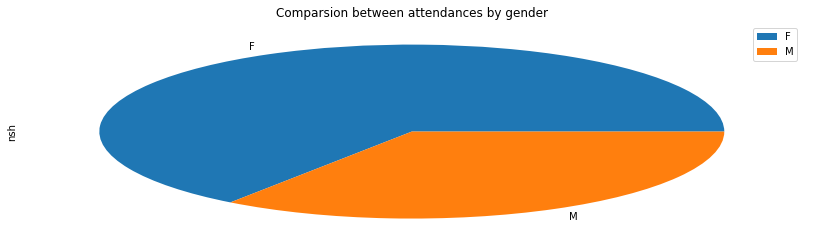

In [25]:
# what is the precentage of genders absent?
def attendance(df_app,col_name,attended,absent):
    plt.figure(figsize=[14,4])
    df_app[col_name][nsh].value_counts(normalize=True).plot(kind='pie', label='nsh')
    plt.legend();
    plt.title('Comparsion between attendances by gender');
attendance(df_app, 'Gender', sh, nsh)

### Gender has no  effect on attendence rate

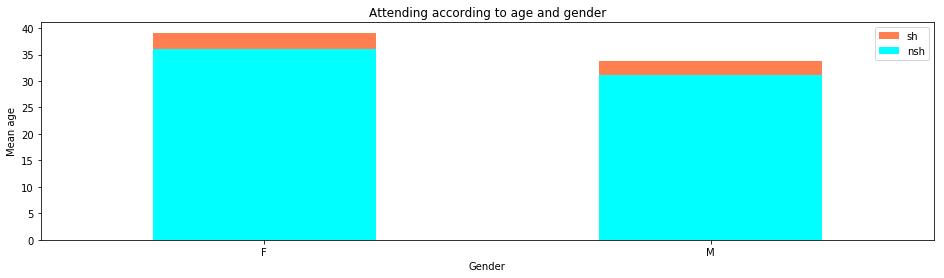

In [26]:
# does age and gender affect the attendence rate (we will check by gender mean age)
plt.figure(figsize=[16,4])
df_app[sh].groupby('Gender').Age.mean().plot(kind='bar', color='coral', label='sh')
df_app[nsh].groupby('Gender').Age.mean().plot(kind='bar', color='cyan', label='nsh')
plt.legend();
plt.title('Attending according to age and gender')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Mean age');

In [27]:
print(df_app[sh].groupby('Gender').Age.mean(), df_app[nsh].groupby('Gender').Age.mean(), df_app[sh].groupby('Gender').Age.median(), df_app[nsh].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


### There is no connection between age and gender affecting the attendence rate 

The mean and the median of genders ages are almost the same

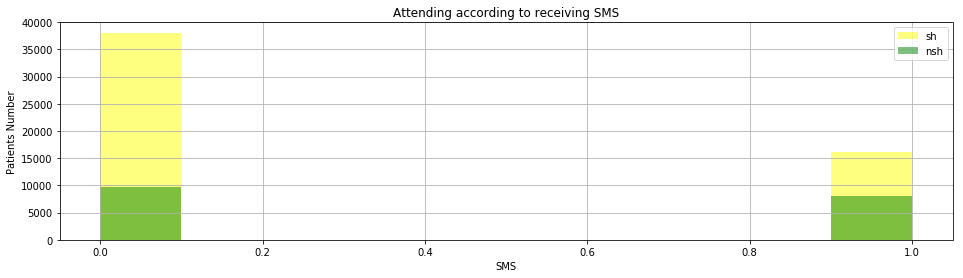

In [28]:
# does receiving sms affect the attendence rate
def attendance(df_app,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df_app[col_name][sh].hist(alpha=0.5, bins=10, color='yellow', label='sh')
    df_app[col_name][nsh].hist(alpha=0.5, bins=10, color='green', label='nsh')
    plt.legend();
    plt.title('Attending according to receiving SMS')
    plt.xlabel('SMS')
    plt.ylabel('Patients Number');
attendance(df_app, 'SMS_received', sh, nsh)

### The number of showing patients without receiving sms is greater than showing patients with receiving sms

Which means that we need to revise our sms policies

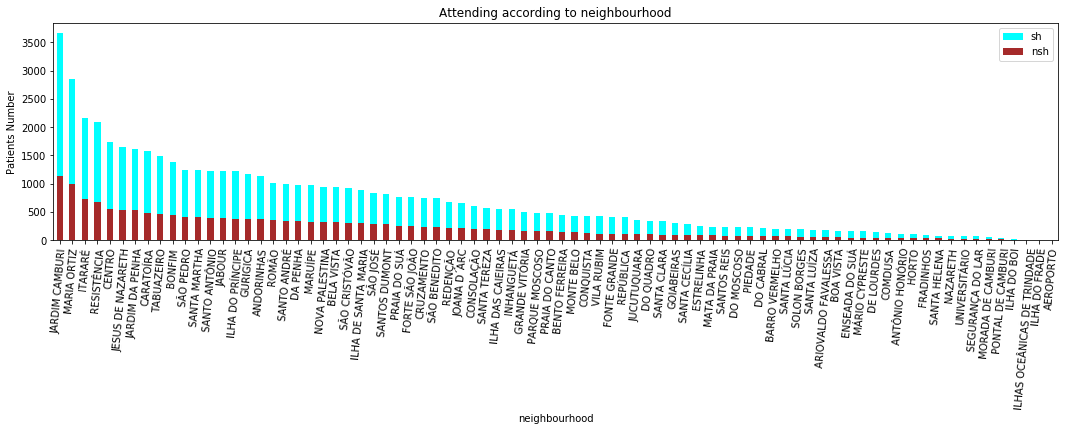

In [29]:
# does neighbourhood affect the attendence rate
plt.figure(figsize=[18,4])
df_app.Neighbourhood[sh].value_counts().plot(kind='bar', color='aqua', label='sh')
df_app.Neighbourhood[nsh].value_counts().plot(kind='bar', color='brown', label='nsh')
plt.legend();
plt.title('Attending according to neighbourhood')
plt.xticks(rotation=85)
plt.xlabel('neighbourhood')
plt.ylabel('Patients Number');

### Neighbourhood has agreat effect on attendence or not

Which it clear at Jardim Camburi because it has the greatest number of patients and also has the greatest attending rate

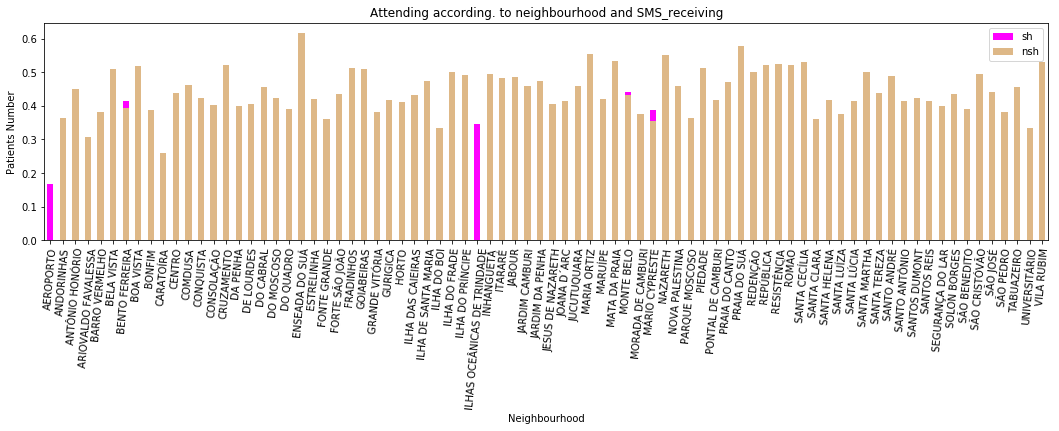

In [30]:
plt.figure(figsize=[18,4])
df_app[sh].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='magenta', label='sh')
df_app[nsh].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='burlywood', label='nsh')
plt.legend();
plt.title('Attending according. to neighbourhood and SMS_receiving')
plt.xticks(rotation=85)
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

### Patients attendance from specific neighbourhood differ according to ages 

AEROPORTO then ILHA DOBOI are with high ages attendance rate

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

**Neighbourhood** has agreat effect on attendence or not, Which it clear at Jardim Camburi because it has the greatest number of patients and also has the greatest attending rate.

The number of attending pattients from specific neighbourhood affected by **receiving sms** and **ages**.

**Age** has a clear influence on the showing rate. Age from 0 years old to 8 years old have the most attendance rate that because parents taking care of their kids, then the age from 45 years old to 55 years old and the least attending are whom above 65 years old.

The number of attending patients **without receiving sms** is greater than attending patients **with receiving sms** , which means that we need to revise our sms policies.

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

There is no clear connection between **attending** and (**gender**, **chronic diseases**, **enrollement in the welfare program**)

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0